# Assignment 2: ECE8410: Computer Vision

### Aniruddha Das 201715695

#### NOTE: For Nearest Neighbour Interpolation, Bilinear Interpolation and Anti-aliasing Filter, to check change in size, please use cv2.imshow() 

##### NOTE: cv2.imshow() cannot be used to view images simultaneously. When cell containing cv2.imshow() is run, close the displayed image (will appear in a seperate window) before running next cell in notebook

## Importing Libraries

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import math

## Inputting and Printing Test Image

(-0.5, 999.5, 599.5, -0.5)

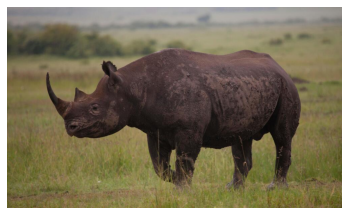

In [4]:
img = cv2.imread('TestImg.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')

#### Obtaining Image Dimensions

In [5]:
H, W, C = img.shape
print(f"Image height: {H}")
print(f"Image width: {W}")
print(f"Number of image channels: {C}")

Image height: 600
Image width: 1000
Number of image channels: 3


##### Testing Mechanism for splitting image into seperate colour channels and merging them back. Used in convolution filter function

In [6]:
(R, G, B) = cv2.split(img)

In [37]:
R.shape

(600, 1000)

In [13]:
cv2.imshow('ImageWindow',R)
cv2.waitKey()

-1

In [14]:
m = cv2.merge([R,G,B])

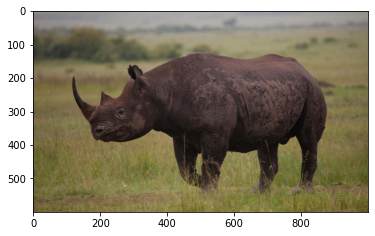

In [15]:
plt.imshow(m)

## Q1: Image Resizing

### Nearest Neighbour Interpolation

In [87]:
def NNresize(img, s):
    i = np.zeros(shape=[int(H*s), int(W*s), C], dtype=np.uint8)
    enl = math.sqrt(((int(s*H) * int(s*W)) / (H*W)))
    for h in range (int(H*s)):
        for w in range (int(W*s)):
            px = math.floor(h/enl)
            py = math.floor(w/enl)
            i[h,w]=img[int(px),int(py)]
    
    return i

#### Testing Function

##### Enter scaling factor here (in decimal)

In [88]:
Snn = 0.25

(150, 250, 3)

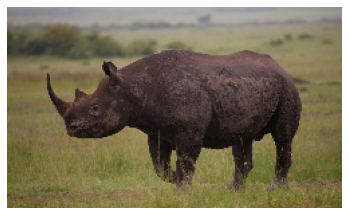

In [89]:
i1 = NNresize(img, Snn)
plt.imshow(i1)
plt.axis('off')
i1.shape                          # should be (s*H, s*W, 3)

#### Using cv2 to display the size difference between original image and resized image

##### Original Image

In [109]:
cv2.imshow('ImageWindow', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

##### Resized Image

In [110]:
cv2.imshow('ImageWindow', cv2.cvtColor(i1, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

### Bilinear Interpolation

In [103]:
def cal_BI(img, y, x):
        
    # finding corner coordinates
    y_top = int(y)                                                     # top in image representation is low in y value
    x_left = int(x)
    y_bottom = min(y_top+1, H-1)
    x_right = min(x_left+1, W-1)

    # extracting fractional component
    y_frac = y - y_top
    x_frac = x - x_left

    # finding pixel values at corner -> top left, top right, bottom left and bottom right
    intensity_tl = img[y_top, x_left]
    intensity_tr = img[y_top, x_right]
    intensity_bl = img[y_bottom, x_left]
    intensity_br = img[y_bottom, x_right]

    # bilinear interpolation of intensity values based on fractional components
    intensity_t = intensity_tl * (1-x_frac) + intensity_tr * x_frac               # Top instensity
    intensity_b = intensity_bl * (1-x_frac) + intensity_br * x_frac               # Bottom Intensity
    intensity = intensity_t * (1-y_frac) + intensity_b * y_frac                   # Net Intensity

    return intensity

In [104]:
def BIresize(img, s):
    i = np.zeros(shape=[int(H*s), int(W*s), C], dtype=np.uint8)

    # compute intensity at each pixel
    for h in range(int(H*s)):
        for w in range(int(W*s)):

            # compute position of resized pixel in original image
            y = h / s
            x = w / s

            # fill value using bilinear interpolation
            i[h, w] = cal_BI(img, y, x)

    return i

#### Testing Function

##### Enter scaling factor here (in decimal)

In [105]:
Sbi = 2

(1200, 2000, 3)

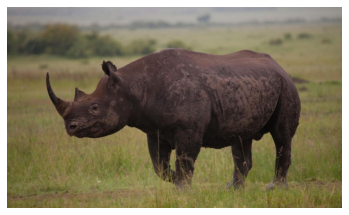

In [106]:
i2 = BIresize(img, Sbi)
plt.imshow(i2)
plt.axis('off')
i2.shape                          # should be (s*H, s*W, 3)

#### Using cv2 to display the size difference between original image and resized image

##### NOTE: cv2 plots cannot be used to view images simultaneously. Close the displayed image before running the next cell. 

##### Original Image

In [107]:
cv2.imshow('ImageWindow', cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

In [108]:
cv2.imshow('ImageWindow', cv2.cvtColor(i2, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

## Q2: Image Filtering

### Convolution Filter

In [111]:
## Use for B/W images
def conv2Dfilter(img, k):
    i = np.zeros(shape=[H, W], dtype=np.uint8)
    k_f = np.flipud(np.fliplr(k))
    
    # Zero padding
    img_p = np.zeros(shape=[H+(k.shape[0]-1), W+(k.shape[1]-1)], dtype=np.uint8)
    img_p[k.shape[0]//2 : -k.shape[0]//2 + 1, k.shape[1]//2 : -k.shape[1]//2 + 1] = img
    #plt.imshow(img_p)
    
    for h in range(H):
        for w in range(W):
            
            i[h,w] = (k_f*img_p[h : h+k.shape[0], w : w+k.shape[1]]).sum()
            
            
    return i

In [112]:
## Use for RGB images
def conv3Dfilter(img, k):
    (R, G, B) = cv2.split(img)
    c2dr = conv2Dfilter(R, k)
    c2dg = conv2Dfilter(G, k)
    c2db = conv2Dfilter(B, k)
    m = cv2.merge([c2dr, c2dg, c2db])
    return m

#### Testing Function

##### Enter kernel here

In [113]:
K = np.array([[0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1], [0.1, 0.1, 0.1, 0.1, 0.1]])

(-0.5, 999.5, 599.5, -0.5)

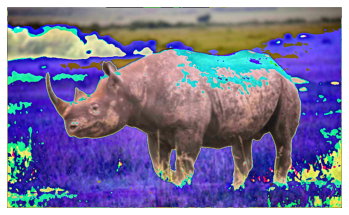

In [114]:
i3 = conv3Dfilter(img, K)



plt.imshow(i3)
plt.axis('off')

### Box Filter

In [115]:
def boxfilter(img, k):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    kernel = np.ones(shape=[k, k])
    K = (1/(k*k))*kernel
    i = conv3Dfilter(img, K)
    return i

#### Testing Function

##### Enter kernel size here

In [120]:
Ks = 20

(-0.5, 999.5, 599.5, -0.5)

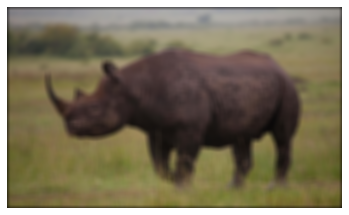

In [121]:
i4 = boxfilter(img, Ks)
plt.imshow(i4)
plt.axis('off')

### Anti-aliasing Filter

In [122]:
def aafilter(img, k, s):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = boxfilter(img, Ks)                             
    i = NNresize(i, s)
    return i

#### Testing Function

##### Enter downsampling factor here

In [123]:
size = 5
Saa = 1/size
Ks = 10

(120, 200, 3)

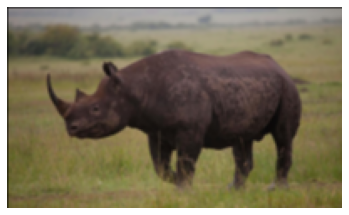

In [124]:
i5 = aafilter(img, Ks, Saa)
plt.imshow(i5)
plt.axis('off')
i5.shape                          # should be ((1/size)*H, (1size)*W, 3)

##### Using cv2 plots to display anti-sliased image

In [125]:
cv2.imshow('ImageWindow', cv2.cvtColor(i5, cv2.COLOR_RGB2BGR))
cv2.waitKey()

-1

### High Pass Filter

In [126]:
def hpfilter(img):
    k = np.asarray([[0,-1,0], [-1,4,-1], [0,-1,0]])
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    i = conv3Dfilter(img, k)
    return i

#### Testing Function

(-0.5, 999.5, 599.5, -0.5)

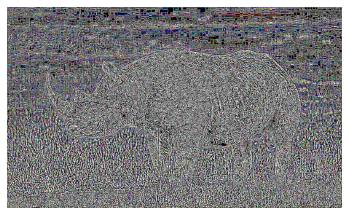

In [127]:
i6 = hpfilter(img)
plt.imshow(i6)
plt.axis('off')

## Q3: Gaussian Filtering

In [128]:
def gfilter(img, sigma):
    i = np.zeros(shape=[H, W, C], dtype=np.uint8)
    Kgfs = int(6*sigma)
    if (Kgfs%2 == 0):
        Kgfs = Kgfs + 1
        
    Gaussk = np.zeros(shape=[Kgfs, Kgfs])
    
    for x in range(-Kgfs//2, (Kgfs//2)+1):
        for y in range(-Kgfs//2, (Kgfs//2)+1):
            a = 2 * np.pi * (sigma**2)
            b = np.exp(-(x**2 + y**2)/(2 * sigma**2))
            Gaussk[x+Kgfs//2, y+Kgfs//2] = (1/a)*b
    
    i = conv3Dfilter(img, Gaussk)
    return i

#### Testing Function

##### Enter sigma parameter(sigma) here. KgfS (Hernel for Gaussian Filter size) has to be the odd number after 6*sigma

In [129]:
sigma = 6

(-0.5, 999.5, 599.5, -0.5)

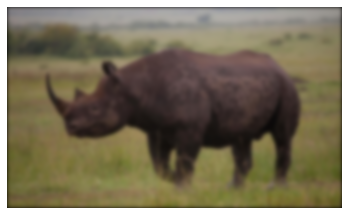

In [130]:
i7 = gfilter(img, sigma)
plt.imshow(i7)
plt.axis('off')